# Final delivery

## Advance topics in Machine Learning

### Predicting student's courses for next semester

- Martin Anselmo
- Guillermo Espinosa


## Introduction

For university professors and administrators, knowing how many students will take a course in advance allows them to plan and organize the subject in a better way, so that they can prepare the course better and create a better class environment.

Due to the number of students that the engineering school of the Pontificia Universidad Católica de Chile has, which exceeds 3000, knowing how many students are going to take a course allows you to better manage resources by opening or closing courses vacancies if necessary. A great cost (monetary and time) for the engineering school comes from how many teachers and students to assign for a each course and sections, and it is bad for both students and those in charge to have crowded or empty classrooms. For this reason, a system that tells how many vacancies are going to be needed per course based on different variables could be very useful.

Due to the above, we propose a Bayesian Neural Network Model that predicts which courses is going to take each student based on what have they taken in previous semesters. We are going to use data obtained from the computer science department of course applications since 2015. It includes what each student has taken, in which semester and in which major and minor they are.

All of this is was achived by using concepts learned from the course that can be applied to the real world.


## Theoretical framework


Our proposal is based on a Bayesian implementation of neural networks. These are models capable of classifying information based on different parameters, all through supervised learning, since we are passing many inputs with their respective classes, so that they "learn" how to classify.
There are many types of neural networks, each with different uses:
![tipos de redes](https://img.microsiervos.com/images2016/Neural-Networks-Chart.png)


But we are going to look at the simplest, the multilayer perceptron, because it is the most used, and supported by libraries that do this type of work. It has an input layer, hidden layers and an output layer, with an activation function. In each connection there is a weight and an associated "bias", which are necessary for all calculations.

#### Why networks Bayesian neural networks?

In general, classical neural networks have given excellent results in various fields, being used in a multitude of contexts, such as image classification, text creation, etc. The problem they have is that they need an enormous amount of data to be trained, and in the event that it is necessary to predict something rare (such as a rare disease), there are not going to be many example data. This generally causes the network to over-train with the more common classes, and this is something that Bayesian networks come to fix.
In our case, we want to predict courses of the computer department of the PUC, a course that is mandatory for engineering is introduction to programming (IIC1103), a typical problem of a classic neural network for this case would always be to predict this course. The use of Bayesian networks will prevent this.

#### Bayesian neural networks

The Bayesian part comes in two, each with an associated problem:
1. Work with prior knowledge (* prior *), corresponding to different probability distributions on the weights of the network. The problem is, that in neural networks this knowledge has little to do with the structure itself. To solve this, we are going to work with * priors * that are not very informative for us, but which will also influence the network's decision making a lot. This is because it will no longer be "yes" or "no", but "maybe", and it will depend a lot on the current state of the network.
2. To obtain correct predictions, the posterior one must be integrated. This is very demanding, or impossible in some cases. To solve this, we are going to work with samples on the network. As we are going to work with distributions on the parameters, after training we will have a network with the hyperparameters of each of the distributions, so we can take samples of networks, and thus decide.

Then, the structure of the Bayesian network is defined in a very similar way to a multilayer perceptron, only now instead of fixed parameters, we are going to have probability distributions on the weights.

![](https://www.researchgate.net/profile/Zhenhua_Li12/publication/328757994/figure/fig1/AS:689808791830528@1541474640467/A-Bayesian-neural-network-with-one-hidden-layer.ppm)

#### Training

There are several ways to train ranking models. The best known is backpropagation, which is based on taking gradients, and changing parameters in the direction of maximum growth. This method is not so good for Bayesian networks, since they take into account uncertainties, and backpropagation can go in that direction. We are going to focus on a method called * Bayes by Backprop *, created specifically to train networks of this type. It is based on that instead of training a single model, it trains an assembly of models, taking weights from a joint distribution. This method only doubles the number of parameters, but trains an infinite assembly of models using Monte Carlo methods (actually, of variational inference, since the methods already named are still very difficult in this context).

It is impossible to calculate the integral of the parameters, so a variational inference method will be used to estimate the distribution, using ELBO as a loss function. In each iteration / epoch our program will take several samples of the parameters, and be guided by them.
It should be noted that this is going to be done by the Pyro library, which we will talk about later.

#### Choice of priors

Earlier we said that there is a problem in this part, although we have previous knowledge of the problem (that certain students should take as mesh), it is difficult to reflect this in the structure of a neural network. This is why we decided on normal distributions with initial parameters 0 and 1, for the mean and standard deviation respectively.

#### Obtaining predictions

To obtain model predictions, different samples of models will be generated. For each one of these models, they will be asked to which class the given input corresponds and if there is consensus on the class to which the input belongs, it will be decided by this. The Bayesian part comes when there is none consensus. Then, the network is going to be allowed to say "I don't know", which is a very valuable tool in our case. For example, when asked by a student who is not necessarily going to take a course of computing in the following semester, the network will not be forced to choose a class (course), but will say that it is not certain.

## Methodology

In order to predict with Bayesian networks which courses students will be taking next semester, we had to carry out several steps, which are detailed below.

### 1. Investigating Bayesian Neural Networks
Not much information is available on Bayesian methods, especially Bayesian neural networks. However, we found some python libraries that do this, such as Edward or Pyro, along with their respective tutorials. We decided to use Pyro, since it seemed easier to use, and was well documented.

### 2. Data processing
Pyro is an implementation of Bayesian methods based on the Pytorch machine learning library, which is why we first had to bring the data we had to a training set, which would work with the aforementioned libraries.

We start by defining the structure of the network, a simple multilayer perceptron, with a hidden layer. For this, we decided to make an input array that contains all the information necessary to classify correctly, and an output array that contains the the courses that a certain input (student) will take.
We obtained the data from the Computer Department, and consisted of an excel file with the following information in each row:

- student id (anonymous)
- Semester in which student is took the course
- Career
- Program which student is enrolled
- Major and minor
- Semester enrolled
- Course
- More information which is unnecesary

We had to process all this information (detailed later) to obtain an input that can be entered into the neural network.

### 3. Classic Neural Network

We decided to train a classic neural network, to compare results. It has the same structure as the Bayesian network, only with "fixed" parameters instead of distributions.

### 4. Bayesian neural network

Using the same network structure as in the previous part, we build and train the network.

### 5. Changes compared to the last version

We decided to make several changes to the structures of our delivery 1 networks, with the main objective of making them better represent reality.

1. Network structure
    - We tried different network structures, with more hidden layers, different activation functions.
    - Network output: before, we had a log-softmax activation function, which was wrong, because is a function that expectes one class and only to be the correct one, and this is not the case.
    - Since you can take more than one courses, we had to change the loss function for a more appropriate one. We chose `MultiLabelSoftMarginLoss`, which does exactly this.
    - Now we have to choose if a student takes 0 or more courses, this is why we add confidence to the choice.
2. Bayesian part
    - Since the structure of the classical network is shared with the Bayesian one, for the Bayesian part of our project we made the same changes as in (1)
    - Since the Bayesian network makes a decision with several samples of networks, we can calculate the variance in the output. By doing this, we can see if the result comes by chance or if the network really knows what it is saying.

### Code

We start by importing all the libraries that we will use, the main ones will be pytorch, which implements an interface to implement neural networks easily, and pyro, which allows using Bayesian methods on pytorch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
import random
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = [15, 15]
drive.mount('/content/drive')

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchsummary import summary


In [3]:
!pip install pyro-ppl

In [4]:
import pyro
from pyro.distributions import Normal, Multinomial
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam, Adadelta

## Preprocessing

We read the data, (make sure they are in the same directory), and clean the columns that we don't need.

In [5]:

try:
    students_enrollment = pd.read_excel("Analisis_vacantes_IIC.xlsx")

except FileNotFoundError:
    students_enrollment = pd.read_excel("/content/drive/My Drive/proyectIDM/Analisis_vacantes_IIC.xlsx")

students_enrollment = students_enrollment[students_enrollment['Nivel Programa'] == 'PR - Pregrado']
students_enrollment = students_enrollment[students_enrollment['Escuela Alumno'] == '04 - Ingeniería']
students_enrollment = students_enrollment.drop(columns=['Escuela Curso',
                                          'Nivel Principal ',
                                          'NRC','Materia', 
                                          'Número Curso', 
                                          'Sección', 
                                          'CURSO-SEC', 
                                          'Método verificación Requisitos', 
                                          'Programa', 
                                          'Status Alumno', 
                                          'Vacante Asignada (S/N)', 
                                          'Sobrepaso (S/N)', 
                                          'Status Inscripción Curso ', 
                                          'Escuela Alumno'])
students_enrollment.rename(columns = 
                    {'periodo': 'semestre',
                     'CURSO': 'curso',
                     'Nombre Curso':'nombre',
                     'Escuela Alumno': 'escuela',
                     'Nivel Programa': 'programa',
                     'Periodo Admisión': 'admision',
                     'MAJOR BANNER': 'major',
                     'MINOR BANNER':'minor',
                     'N° ALUMNO ANÓNIMO': 'alumno'}, inplace = True)

students_enrollment = students_enrollment.replace(np.nan, 'NA', regex=True)

order_semesters = {
    200420: 0, 
    200422: 1, 
    200520: 2, 
    200522: 3, 
    200620: 4, 
    200622: 5, 
    200720: 6, 
    200722: 7, 
    200820: 8, 
    200822: 9, 
    200920: 10, 
    200922: 11, 
    201020: 12, 
    201022: 13, 
    201120: 14, 
    201122: 15,
    201220: 16, 
    201222: 17, 
    201320: 18, 
    201322: 19,
    201420: 20, 
    201422: 21, 
    201520: 22, 
    201522: 23,
    201620: 24, 
    201622: 25, 
    201720: 26, 
    201722: 27,
    201820: 28, 
    201822: 29, 
    201920: 30, 
    201922: 31,

}


# students_enrollment['semestre'], mapping_semester = pd.Series(students_enrollment['semestre']).factorize()
students_enrollment['curso'], mapping_course = pd.Series(students_enrollment['curso']).factorize()
students_enrollment['nombre'], mapping_name = pd.Series(students_enrollment['nombre']).factorize()
# students_enrollment['admision'], mapping_admision = pd.Series(students_enrollment['admision']).factorize()
students_enrollment['major'], mapping_major = pd.Series(students_enrollment['major']).factorize()
students_enrollment['minor'], mapping_minor = pd.Series(students_enrollment['minor']).factorize()
students_enrollment['programa'], mapping_program = pd.Series(students_enrollment['programa']).factorize()




students_enrollment['semestre_actual'] = students_enrollment.apply (lambda row: order_semesters[row['semestre']] - order_semesters[row['admision']], axis=1)


# Reordenar columnas y sacar la de nombres 
cols = students_enrollment.columns.tolist()

# print(cols)

cols = [cols[1]] + [cols[3]] + [cols[4]] + cols[6:]

students_enrollment = students_enrollment[cols]

students_enrollment.head()


,curso,alumno,programa,major,minor,semestre_actual
18,0,11,0,0,0,6
19,1,11,0,0,0,6
20,2,11,0,0,0,6
21,1,11,0,0,0,7
22,0,11,0,0,0,8


Then, we transform the inputs into a form that the classifier can understand, in this case, the input vector
It will be a list of ones and zeros that represent which courses a student has taken in each previous semester, in which semester this is and to which major and minor program it belongs.

### Input
We define a total of 31 semesters (most will be empty), and 40 courses of the DCC. The input corresponds to:

#### Part 1
Semester numbor 0 of student:
$$
[\text{onehot encoding of courses the student have taken up to that semester}]
== [0, \ldots, 0]
$$
Since he/she has not taken any, they are only zeros

Semester 1 of student: (assuming on semester 0 he took only *introduccion a la programacion* and it's index is 0)
$$
[\text{onehot encoding of courses the student have taken up to that semester}]
== [1, \ldots, 0]
$$ 

So on until semester 31.

#### Part 2
One hot encoding of the semester where you are consulting what courses you want to take.

#### Parte 3
One hot encoding of the major in which the student is enrolled.

#### Parte 4
One hot encoding of the minor in which the student is enrolled.

#### Parte 5
One hot encoding of the program that the student is enrolled.

#### Total

$$\text{sizee of input} = n_{semesters}*n_{courses} + n_{courses} + n_{majors} + n_{minors} + n_{programs}$$


### Output

Vector $n_{courses}$ long with ones indicating which courses the sudent is going to take next semester (part 2).

In [6]:
inputs = []
outputs = []

n_semesters = len(order_semesters.values())
n_courses = len(mapping_name)
n_majors = len(mapping_major)
n_minors = len(mapping_minor)
n_programs = len(mapping_program)

for student in students_enrollment.groupby(["alumno"]):
    a = student[1].sort_values('semestre_actual')
    in_ = [0 for i in range(n_semesters*n_courses)] # Previous semesters
    in_ += [0 for i in range(n_semesters)] # Actual semester
    in_ += [0 for i in range(n_majors)]
    in_ += [0 for i in range(n_minors)]
    in_ += [0 for i in range(n_programs)]
  
    for semester in a.groupby("semestre_actual"):
        semester_actual = semester[0]
        # print(semester[1])
        taken = []
        for tupla in semester[1].values: 
      
            course = tupla[0]
            taken.append(course)
            program = tupla[2]
            major = tupla[3]
            minor = tupla[4]
            

            # Pos semester actual = n_semesters*n_courses + semester_actual
            in_[n_semesters*n_courses + semester_actual] = 1

            # Major = n_semesters*n_courses + n_semesters + major
            in_[n_semesters*n_courses + n_semesters + major] = 1

            # Minor = n_semesters*n_courses + n_semesters + n_majors + minor
            in_[n_semesters*n_courses + n_semesters + n_majors + minor] = 1

            # program = n_semesters*n_courses + n_semesters + n_majors + n_minors + program
            in_[n_semesters*n_courses + n_semesters + n_majors + n_minors + program] = 1

      
        inputs.append(in_[:])
        in_[n_semesters*n_courses + semester_actual] = 0
        
        
        out = [0 for i in range(n_courses)]

        # I update the following semesters (The courses each student have taken so far)
        for i in taken:
          # Position of the course is semester_actual*40 + pos_course
            pos_course = semester_actual*n_courses + i
            in_[pos_course] = 1
            out[i] = 1
        outputs.append(out)
        
    

    
    
inputs = np.array(inputs)
outputs = np.array(outputs)


inputs[0]


array([0, 0, 0, ..., 0, 0, 1])

In addition, each of the categories has been passed to numerical data, for easier handling, and we have saved the corresponding mappings.

We separate training data and test data

In [7]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.33, random_state=42)

Pasamos el input a lo que necesita torch

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Torch necesita lista de tuplas (tensor, clase)
trainset = []
testset = []

for input_, clase in zip(inputs_train, outputs_train):
  
    classes = np.where(clase == 1)[0]
    n = classes.shape[0]

    for i in range(n):
        trainset.append((torch.tensor(input_, dtype=torch.float), classes[i]))


  
for input_, clase in zip(inputs_test, outputs_test):
  
    classes = np.where(clase == 1)[0]
    n = classes.shape[0]

    for i in range(n):
        testset.append((torch.tensor(input_, dtype=torch.float), classes[i]))
        
        

inputs_train_2 = np.array_split(inputs_train, 50) 
inputs_test_2 = np.array_split(inputs_test, 25)
outputs_train_2 = np.array_split(outputs_train, 50)
outputs_test_2 = np.array_split(outputs_test, 25)
for i in range(len(inputs_train_2)):
    inputs_train_2[i] = torch.from_numpy(inputs_train_2[i]).to(device).to(torch.float)
    outputs_train_2[i] = torch.from_numpy(outputs_train_2[i]).to(device).to(torch.float)
    
for i in range(len(inputs_test_2)): 
    inputs_test_2[i] = torch.from_numpy(inputs_test_2[i]).to(device).to(torch.float)
    outputs_test_2[i] = torch.from_numpy(outputs_test_2[i]).to(device).to(torch.float)

In [9]:
inputs_test_2[i]

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]], device='cuda:0')

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64
test_batch_size = 256
epochs = 100
lr = 0.01
momentum = 0.5

kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}


# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)
# testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size,
#                                           shuffle=False, num_workers=2)

## Neural network

In the neural network model (both basic and Bayesian), a class is created that defines the structure that it will have. For this first installment, it was decided to use a simple one-layer neural network, which in the future will try to structure in a better way for better performance.

In this project we are going to compare the classic implementation of a multilayer perceptron, and a Bayesian neural network based on the same structure, so we will be able to see which one gives better results.

In [11]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size_1 ,output_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.out = nn.Linear(hidden_size_1, output_size)
        

    def forward(self, x):
        output = self.fc1(x)
        output = F.relu(output)
        output = self.out(output)
        return output

In order for neural networks to be trained, a train function is created that controls how the network is trained. That is, see what loss function it uses, how big the jump is in each step, how much data is used in each iteration and what optimizer is used.

In addition, it is necessary to be able to test the data, therefore the test function is created that evaluates how the data was created with the test set.

In summary, the basic neural network (not yet Bayesian) that was created is:

In [12]:
print("Input in: ", n_semesters*n_courses + n_semesters + n_majors + n_minors + n_programs)
net = NN(n_semesters*n_courses + n_semesters + n_majors + n_minors + n_programs, 3000, n_courses).to(device)

summary(net, trainset[0][0].shape)

Input in:  1443
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 3000]       4,332,000
            Linear-2                   [-1, 40]         120,040
Total params: 4,452,040
Trainable params: 4,452,040
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 16.98
Estimated Total Size (MB): 17.01
----------------------------------------------------------------


Here we proceed to train the neural network:

In [13]:
optimizer = optim.Adadelta(net.parameters())
criterion = nn.MultiLabelSoftMarginLoss()

losses_total = []
accuracy_total = []

epochs = 400
for epoch in range(epochs):
    losses = []
    for sample, label  in zip(inputs_train_2, outputs_train_2):
        output = net(sample)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data.mean().item())
        
    losses_total.append(np.mean(losses))
    if epoch%50 == 0:
        torch.cuda.empty_cache()
        print("epoch", epoch, 'Loss: {:.3f}'.format(np.mean(losses)))
        result = []
        size = []
        for data0, data1 in zip(inputs_test_2, outputs_test_2):
            output = (Multinomial(logits= net(data0)).mean > 0.3).to(torch.float)
            compa = torch.eq(output, data1)
            result.append(torch.sum(torch.sum(compa, dim = 1) == 40).item())
            size.append(len(output))
        print('Accuracy: ', sum(result)/sum(size))
        accuracy_total.append(sum(result)/sum(size))
    else:
        accuracy_total.append(sum(result)/sum(size))




epoch 0 Loss: 0.334
Accuracy:  0.0
epoch 50 Loss: 0.082
Accuracy:  0.40155296727676093
epoch 100 Loss: 0.074
Accuracy:  0.4317803660565724
epoch 150 Loss: 0.070
Accuracy:  0.4425956738768719
epoch 200 Loss: 0.067
Accuracy:  0.4509151414309484
epoch 250 Loss: 0.064
Accuracy:  0.45174708818635606
epoch 300 Loss: 0.062
Accuracy:  0.45368829728230725
epoch 350 Loss: 0.060
Accuracy:  0.45701608430393786


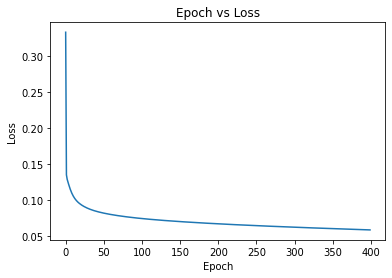

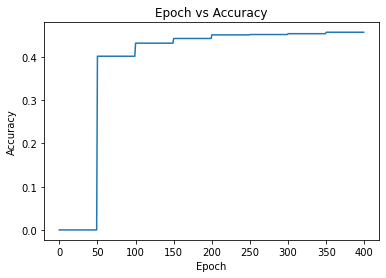

In [14]:
plt.plot(range(400), losses_total)
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()
plt.plot(range(400), accuracy_total)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Epoch vs Accuracy")
plt.show()

In [15]:
result = []
size = []
for data0, data1 in zip(inputs_test_2, outputs_test_2):
    output = (Multinomial(logits= net(data0)).mean > 0.5).to(torch.float)
    compa = torch.eq(output, data1)
    result.append(torch.sum(torch.sum(compa, dim = 1) == 40).item())
    size.append(len(output))
print("How many did it get in each batch:", result)
print("size of batch:", size)
print("Accuracy: ", sum(result)/sum(size))

How many did it get in each batch: [65, 61, 62, 69, 58, 61, 59, 56, 58, 57, 63, 59, 61, 57, 63, 65, 64, 65, 58, 66, 61, 63, 69, 54, 63]
size of batch: [145, 145, 145, 145, 145, 145, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
Accuracy:  0.4262340543538547


As you can see, we immediately reached a decent result (considering that we are saying it is correct only if it gets all the courses right).

## Bayesian Neural Network

For the Bayesian neural network, the same network structure is used as in the basic network, we even use the same class as in the previous network. The difference lies in the model that is established for the links. In the first box, a network is created as in the previous one.

In [16]:
net_bayesian = NN(n_semesters*n_courses + n_semesters + n_majors + n_minors + n_programs, 1000, n_courses).to(device)
summary(net_bayesian, trainset[0][0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1000]       1,444,000
            Linear-2                   [-1, 40]          40,040
Total params: 1,484,040
Trainable params: 1,484,040
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 5.66
Estimated Total Size (MB): 5.67
----------------------------------------------------------------


In this function and the next one is where the important part of the Bayesian model resides. The following function defines a model for the links in the network, giving them a prior. Since we have no default values, a non-informative prior is established (a normal with zero mean and variance 1). Then, we use the pyro library to create a model that we adjust for our weights and compare the results of training the model with that of the actual data (to train). Furthermore, since we do not know the distribution of weights, variational bayes are used to approximate the distribution of weights to normal.

In [17]:
def model(x_data, y_data):
    
    fc1w_prior = Normal(loc=torch.zeros_like(net_bayesian.fc1.weight), scale=torch.ones_like(net_bayesian.fc1.weight))
    fc1b_prior = Normal(loc=torch.zeros_like(net_bayesian.fc1.bias), scale=torch.ones_like(net_bayesian.fc1.bias))

#     fc2w_prior = Normal(loc=torch.zeros_like(net_bayesian.fc2.weight), scale=torch.ones_like(net_bayesian.fc2.weight))
#     fc2b_prior = Normal(loc=torch.zeros_like(net_bayesian.fc2.bias), scale=torch.ones_like(net_bayesian.fc2.bias))
    
    outw_prior = Normal(loc=torch.zeros_like(net_bayesian.out.weight), scale=torch.ones_like(net_bayesian.out.weight))
    outb_prior = Normal(loc=torch.zeros_like(net_bayesian.out.bias), scale=torch.ones_like(net_bayesian.out.bias))
    
#     priors = {'fc1.weight': fc1w_prior, 'fc1.bias': fc1b_prior,'fc2.weight': fc2w_prior, 'fc2.bias': fc2b_prior,  'out.weight': outw_prior, 'out.bias': outb_prior}
    priors = {'fc1.weight': fc1w_prior, 'fc1.bias': fc1b_prior, 'out.weight': outw_prior, 'out.bias': outb_prior}
    # lift module parameters to random variables sampled from the priors
    lifted_module = pyro.random_module("module", net_bayesian, priors)
    # sample a regressor (which also samples w and b)
    lifted_reg_model = lifted_module()
    lhat = lifted_reg_model(x_data)
    pyro.sample("obs", Multinomial(logits=lhat), obs = y_data)
    

Esta función guía se encarga de que hacer cuando se cree un modelo. Es decir, samplea un modelo de red neuronal con los modelos estimados de pesos para la red.

In [18]:
softplus = torch.nn.Softplus()

def guide(x_data, y_data):
    
    # First layer weight distribution priors
    fc1w_mu = torch.randn_like(net_bayesian.fc1.weight)
    fc1w_sigma = torch.randn_like(net_bayesian.fc1.weight)
    fc1w_mu_param = pyro.param("fc1w_mu", fc1w_mu)
    fc1w_sigma_param = softplus(pyro.param("fc1w_sigma", fc1w_sigma))
    fc1w_prior = Normal(loc=fc1w_mu_param, scale=fc1w_sigma_param)
    # First layer bias distribution priors
    fc1b_mu = torch.randn_like(net_bayesian.fc1.bias)
    fc1b_sigma = torch.randn_like(net_bayesian.fc1.bias)
    fc1b_mu_param = pyro.param("fc1b_mu", fc1b_mu)
    fc1b_sigma_param = softplus(pyro.param("fc1b_sigma", fc1b_sigma))
    fc1b_prior = Normal(loc=fc1b_mu_param, scale=fc1b_sigma_param)
#     # Second layer weight distribution priors
#     fc2w_mu = torch.randn_like(net_bayesian.fc2.weight)
#     fc2w_sigma = torch.randn_like(net_bayesian.fc2.weight)
#     fc2w_mu_param = pyro.param("fc2w_mu", fc2w_mu)
#     fc2w_sigma_param = softplus(pyro.param("fc2w_sigma", fc2w_sigma))
#     fc2w_prior = Normal(loc=fc2w_mu_param, scale=fc2w_sigma_param)
#     # Second layer bias distribution priors
#     fc2b_mu = torch.randn_like(net_bayesian.fc2.bias)
#     fc2b_sigma = torch.randn_like(net_bayesian.fc2.bias)
#     fc2b_mu_param = pyro.param("fc2b_mu", fc2b_mu)
#     fc2b_sigma_param = softplus(pyro.param("fc2b_sigma", fc2b_sigma))
#     fc2b_prior = Normal(loc=fc2b_mu_param, scale=fc2b_sigma_param)
    # Output layer weight distribution priors
    outw_mu = torch.randn_like(net_bayesian.out.weight)
    outw_sigma = torch.randn_like(net_bayesian.out.weight)
    outw_mu_param = pyro.param("outw_mu", outw_mu)
    outw_sigma_param = softplus(pyro.param("outw_sigma", outw_sigma))
    outw_prior = Normal(loc=outw_mu_param, scale=outw_sigma_param).independent(1)
    # Output layer bias distribution priors
    outb_mu = torch.randn_like(net_bayesian.out.bias)
    outb_sigma = torch.randn_like(net_bayesian.out.bias)
    outb_mu_param = pyro.param("outb_mu", outb_mu)
    outb_sigma_param = softplus(pyro.param("outb_sigma", outb_sigma))
    outb_prior = Normal(loc=outb_mu_param, scale=outb_sigma_param)
#     priors = {'fc1.weight': fc1w_prior, 'fc1.bias': fc1b_prior,'fc2.weight': fc2w_prior, 'fc2.bias': fc2b_prior, 'out.weight': outw_prior, 'out.bias': outb_prior}
    priors = {'fc1.weight': fc1w_prior, 'fc1.bias': fc1b_prior, 'out.weight': outw_prior, 'out.bias': outb_prior}
    
    lifted_module = pyro.random_module("module", net_bayesian, priors)
    
    return lifted_module()

Here we specify the optimizer along with setting the model. For this case the optimizer Adam was chosen, but for the next installment you can consider using a different optimizer.

In [19]:
# Podemos cambiar el optimizador
# optim = Adam({"lr": 0.01})
optim = Adadelta({"lr": 0.01})

svi = SVI(model, guide, optim, loss=Trace_ELBO())

Finally, we train the network. A number of iterations equal to 1000 were used.

In [20]:
epochs_bayesiano = 1000

losses_total_bayesiano = []


for epoch in range(epochs_bayesiano):
    loss = 0
    
    for data0, data1 in zip(inputs_train_2, outputs_train_2):
        # calculate the loss and take a gradient step
        loss += svi.step(data0, data1)
    torch.cuda.empty_cache()
    normalizer_train = len(inputs_train)
    total_epoch_loss_train = loss / normalizer_train
    losses_total_bayesiano.append(total_epoch_loss_train)
    print("Epoch ", epoch, " Loss ", total_epoch_loss_train)

/usr/local/lib/python3.6/dist-packages/pyro/primitives.py:406: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


Epoch  0  Loss  9552.021430450639
Epoch  1  Loss  9531.483755657657
Epoch  2  Loss  9496.375575563234
Epoch  3  Loss  9485.011421711788
Epoch  4  Loss  9477.374662402419
Epoch  5  Loss  9454.86917373922
Epoch  6  Loss  9430.367771919544
Epoch  7  Loss  9414.49724804956
Epoch  8  Loss  9392.28048649139
Epoch  9  Loss  9370.527537523227
Epoch  10  Loss  9343.365457938984
Epoch  11  Loss  9329.207279373672
Epoch  12  Loss  9290.887191630172
Epoch  13  Loss  9279.426041291017
Epoch  14  Loss  9263.234085488504
Epoch  15  Loss  9226.773647459238
Epoch  16  Loss  9200.623469182157
Epoch  17  Loss  9180.152356739203
Epoch  18  Loss  9161.244977863747
Epoch  19  Loss  9145.000394230641
Epoch  20  Loss  9114.152307032171
Epoch  21  Loss  9088.972018184419
Epoch  22  Loss  9074.164874721964
Epoch  23  Loss  9037.180736625662
Epoch  24  Loss  9027.33118182288
Epoch  25  Loss  8995.569658343267
Epoch  26  Loss  8980.536047049047
Epoch  27  Loss  8958.34285723497
Epoch  28  Loss  8941.056899907664


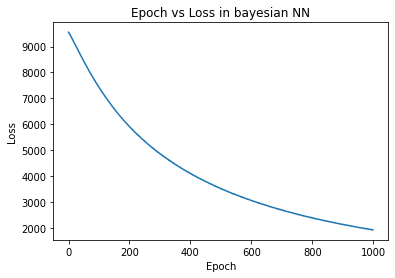

In [21]:
plt.plot(range(epochs_bayesiano), losses_total_bayesiano)
plt.title("Epoch vs Loss in bayesian NN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

At the moment of predicting, the neural network does not take the trained model and see the result, but must sample models according to the distributions of its parameters and for each of the models sampled, pass the data seeing its result. Then, compare all the results seeing which value has the highest probability for all models.

For these networks, there are two forms of prediction. In the first one the classifier is forced to choose, so that although you are not very sure, you choose the one that you think is best. And the second is that if he has a lot of doubt he refrains from choosing and says that he is not capable of deciding correctly, this is achieved since the network does not deliver an absolute result ("the student will take this branch"), but gives a probability that the value is one given the vector delivered.

For the first type of prediction, we obtain an approximate value between 40% and 50% (varies).

In [22]:
num_samples = 100
def predict(x):
    sampled_models = [guide(None, None) for _ in range(num_samples)]
    yhats = [model(x).cpu().data for model in sampled_models]
    mean = torch.mean(torch.stack(yhats), 0)
    return mean

print('Prediction when network is forced to predict')
result = []
size = []
for data0, data1 in zip(inputs_test_2, outputs_test_2):
    predicted = (Multinomial(logits=predict(data0)).mean > 0.01).to(torch.float)
    compa = torch.eq(predicted, data1.cpu())
    result.append(torch.sum(torch.sum(compa, dim = 1) == 40).item())
    size.append(len(output))
print(result)
print(size)
print("Accuracy: ", sum(result)/sum(size))

Prediction when network is forced to predict


/usr/local/lib/python3.6/dist-packages/pyro/primitives.py:406: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


[66, 67, 63, 68, 65, 65, 55, 60, 61, 66, 62, 57, 59, 56, 64, 63, 62, 66, 63, 65, 55, 68, 69, 55, 59]
[144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
Accuracy:  0.4330555555555556


For the second value, if we establish that it has a security greater than 20%, the model refrains from choosing around 650 data and correctly predicts approximately 70%. Also, if we establish that it has a security greater than 30%, the model refrains from choosing around 1300 data and correctly predicts approximately 78% (it can also vary). Then, there is a trade off between how much data the program correctly predicts and how much data it decides to predict, as we will see with the following examples.

In [23]:
num_samples = 100
def predict2(x):
    sampled_models = [guide(None, None) for _ in range(num_samples)]
    yhats = [model(x).cpu().data for model in sampled_models]
    data = [Multinomial(logits = i).mean for i in yhats]
    return data

def test_batch(data0, data1, percent):
    y = predict2(data0)
    data = [[[] for _ in range(len(data1[0]))] for _ in range(len(data1))]
    
    correcto = 0
    aceptado = 0
    saltado = 0
    
    for i in range(len(data1)):
        for j in range(len(data1[0])):
            for k in range(len(y)):
                data[i][j].append(y[k][i][j].item())
            data[i][j].sort()
        prob = (np.percentile(data[i], 50, axis = 1) > percent)
        if np.sum(prob) == 0:
            saltado += 1
        
        elif(np.sum(prob == (data1[i].cpu().numpy()==1)) == 40):
            correcto += 1
            aceptado += 1
        else:
            aceptado += 1
    torch.cuda.empty_cache()
    return aceptado, correcto, saltado

In [24]:
# Prediction when network can decide not to predict
print('Prediction when network can refuse')
skipped = 0
correct = 0
accepted = 0
for data0, data1 in zip(inputs_test_2, outputs_test_2):
    aceptado, correcto, saltado = test_batch(data0, data1, 0.4)
    skipped += saltado
    correct += correcto
    accepted += aceptado

print("Total data: ", accepted + skipped)
print("Skipped:", skipped)
print("Accuracy when made predictions: %d %%" % (100 * correct / accepted))

Prediction when network can refuse


/usr/local/lib/python3.6/dist-packages/pyro/primitives.py:406: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


Total data:  3606
Skipped: 2584
Accuracy when made predictions: 95 %


## Testing with real values


Below are going to take real inputs, not seen by the network, and compare the given values. We are going to look mainly at the courses that the UC engineering program says, and the courses that we (Martin Anselmo and Guillermo Espinosa) have taken as students, since it often happens that the real plan is not followed.

![](https://i.imgur.com/F95OXFz.png)

We define some functions to construct inputs and test easily

In [25]:
def to_verbose(input_):
    # Transform input received by the model to information dictionary
    informacion = {"taken_courses": [], 'semester_actual': 0, "major": "NA", "minor": "NA", "program": "NA"}

    part_courses = input_[:n_semesters*n_courses]
    taken = set()
    for i in range(n_semesters):
#         print(part_courses[i*n_courses: (i+1)*n_courses])
        a = np.where(part_courses[i*n_courses:(i+1)*n_courses] == 1)[0]
        if len(a):
            for k in a:
                taken.add(k)
            
    informacion['taken_courses'] = list(taken)
    
    
    input_ = input_[n_semesters*n_courses:]
    informacion['semester_actual'] = np.where(input_[:n_semesters] == 1)[0][0]
    input_ = input_[n_semesters:]

    informacion['major'] = np.where(input_[:n_majors] == 1)[0][0]
    input_ = input_[n_majors:]


    informacion['minor'] = np.where(input_[:n_minors] == 1)[0][0]
    input_ = input_[n_minors:]

    informacion['programa'] = np.where(input_[:n_programs] == 1)[0][0]
    input_ = input_[n_programs:]


    return informacion
  
def to_input(informacion):
    """
    Method that given a dictionary, returns the input received by the model
    """
    # information = {"taken_courses": {n_semester: [list_courses]}, 'semester_actual': 0, "major": "NA", "minor": "NA", "program": "NA"}
    in_ = [0 for i in range(n_semesters*n_courses)] # Semestres_anteriores
    in_ += [0 for i in range(n_semesters)] # actual semester
    in_ += [0 for i in range(n_majors)]
    in_ += [0 for i in range(n_minors)]
    in_ += [0 for i in range(n_programs)]


            
    for n_semester, list_courses in informacion['taken_courses'].items():
        for course in list_courses:      
              in_[n_courses*n_semester + course] = 1


    in_[n_courses*n_semesters + informacion['semester_actual']] = 1

    in_[n_courses*n_semesters + n_semesters + informacion['major']] = 1

    in_[n_courses*n_semesters + n_semesters + n_majors + informacion['minor']] = 1

    in_[n_courses*n_semesters + n_semesters + n_majors + n_minors + informacion['program']] = 1

    return in_

  
def proba_dict(net, X):
    """
    Return a dictionary {0: 0.25, 1: 0.22 ...} with the probabilities of the following courses.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X= X.to(device)


    output = net(X)
    letras = [mapping_name[i] for i in range(n_courses)]
    probas = [i.item() for i in output[0]]

    dict_proba = dict(zip(letras, probas))
    return dict_proba
  
    
num_samples = 100
def predecir(x):
    """
    Method to predict using the Bayesian network
    Returns a list of trues or false, under the percent confidence interval
    """
    sampled_models = [guide(None, None) for _ in range(num_samples)]
    yhats = [model(x.to(device).float()).cpu().data for model in sampled_models]
    data = [Multinomial(logits = i).mean.numpy() for i in yhats]
    data = np.array(data).transpose()
    data = np.sort(data, axis = 1)
    prob = np.percentile(data, 50, axis = 1)
    del sampled_models
    del yhats
    del data
    torch.cuda.empty_cache()
    return prob



In [26]:
print('We can see the keys of each course for easier handling and testing')
for i, course in enumerate(mapping_name):
    print(i, course)
    
for i, course in enumerate(mapping_major):
    print(i, course)

for i, course in enumerate(mapping_minor):
    print(i, course)

We can see the keys of each course for easier handling and testing
0 Matematicas Discretas
1 Programacion Avanzada
2 Sistemas de Informacion
3 Ingenieria de Software
4 Bases de Datos
5 Visualizacion de Informacion
6 Estructuras de Datos y Algorit
7 Arquitectura de Sistemas de So
8 Sistemas Operativos y Redes
9 Mineria de Datos
10 Arquitectura de Computadores
11 Tecnologias y Aplicaciones Web
12 Inteligencia Artificial
13 Introduccion a la Programacion
14 Proyecto de Especialidad
15 Taller de Aplicaciones en Plat
16 Sistemas Recomendadores
17 Introduccion a  las Aplicacion
18 Programacion Como Herramienta
19 Computacion: Ciencia y Tecnolo
20 Gestion de Proyectos de Tecnol
21 Estrategias y Tecnologias de I
22 Modelos de Procesos
23 Conocimiento, Cultura y Tecnol
24 Tecnologias para Gestion Estra
25 Sistemas Distribuidos
26 Taller de Programacion II
27 Testing
28 Programacion Concurrente
29 Diseno Detallado de Software
30 Diseno y Analisis de Algoritmo
31 Creacion de Videojuegos
32 Proces

### Red no bayesiana

In [27]:
# This is how the information should look
# information = {"taken_course": {n_semester: [list_course]}, 'semester_actual': 0, "major": "NA", "minor": "NA", "program": "NA"}

print(f"We are going to define semester by semester, in order to compare real results with those obtained")

print("\n\n")

second_semester = {"taken_courses": {0: []}, "semester_actual": 1, "major": 3, "minor": 1, "program": 0}
in_ = to_input(second_semester)

print("How information is seen in a simplified way")
print(second_semester)
print("What does the information that the network receives as input look like?")
print(in_)

probs = proba_dict(net, torch.tensor(in_, dtype=torch.float).view(-1, 1443))

print("\n\n\n")

print("If we stay with the predictions where the value obtained is positive, we have the following")

for k in sorted(probs, key=probs.get, reverse=True):
    if probs[k] >= 0:
      print(k, probs[k])


We are going to define semester by semester, in order to compare real results with those obtained



How information is seen in a simplified way
{'taken_courses': {0: []}, 'semester_actual': 1, 'major': 3, 'minor': 1, 'program': 0}
What does the information that the network receives as input look like?
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

As you can see, the second semester achieves perfect acores, predicting only introduction to programming, let's see more semesters.

In [28]:
third_semester = {"taken_courses": {1: [13]}, "semester_actual": 9, "major": 0, "minor": 0, "program": 0}
in_ = to_input(third_semester)
probs = proba_dict(net, torch.tensor(in_, dtype=torch.float).view(-1, 1443))

for k in sorted(probs, key=probs.get, reverse=True):
    if probs[k] >= 0:
      print(k, probs[k])


Programacion Avanzada 0.45078128576278687


We can see how the problems mentioned above begin to emerge, the network is overfitted with introduction to programming, which is the course with more data. Another problem that can easily be noticed is that the course that would correspond would be the exploratory of the major in computing, and despite the fact that it is in the first 5, a student who has made an introduction to programming will not necessarily take it, since that there are many majors apart from computing, where these courses are not followed. This is an inherent problem in conventional networks, since it is forced to predict.

In [29]:
sixth_semester = {"taken_courses": {1: [13], 2: [19], 3: [1], 4: [3, 0], 5: [6, 29, 4]}, "semester_actual": 9, "major": 0, "minor": 0, "program": 0}
in_ = to_input(sixth_semester)
probs = proba_dict(net, torch.tensor(in_, dtype=torch.float).view(-1, 1443))

for k in sorted(probs, key=probs.get, reverse=True):
    if probs[k] >= 0:
      print(k, probs[k])

Diseno Detallado de Software 2.0320682525634766
Tecnologias y Aplicaciones Web 0.6052731275558472
Visualizacion de Informacion 0.4547760486602783
Arquitectura de Sistemas de So 0.34479832649230957
Inteligencia Artificial 0.1360008716583252
Sistemas de Informacion 0.014374583959579468


Here you can see a good progress, but the network chooses to predict many more courses than it should, and even a repeated one.

### Red bayesiana

In [30]:
torch.cuda.empty_cache()
second_semester = {"taken_courses": {0: []}, "semester_actual": 1, "major": 3, "minor": 1, "program": 0}
in_ = to_input(second_semester)
mapping_name[predecir(torch.tensor(in_)) > 0.1]

/usr/local/lib/python3.6/dist-packages/pyro/primitives.py:406: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


Index(['Introduccion a la Programacion'], dtype='object')

In [31]:
third_semester = {"taken_courses": {1: [13]}, "semester_actual": 9, "major": 0, "minor": 0, "program": 0}
in_ = to_input(third_semester)
mapping_name[predecir(torch.tensor(in_)) > 0.1]

/usr/local/lib/python3.6/dist-packages/pyro/primitives.py:406: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


Index([], dtype='object')

In [32]:
sixth_semester = {"taken_courses": {1: [13], 2: [19], 3: [1], 4: [3, 0], 5: [6, 29, 4]}, "semester_actual": 9, "major": 0, "minor": 0, "program": 0}
in_ = to_input(sixth_semester)
mapping_name[predecir(torch.tensor(in_)) > 0.1]

/usr/local/lib/python3.6/dist-packages/pyro/primitives.py:406: FutureWarning: The `random_module` primitive is deprecated, and will be removed in a future release. Use `pyro.nn.Module` to create Bayesian modules from `torch.nn.Module` instances.
  "modules from `torch.nn.Module` instances.", FutureWarning)


Index([], dtype='object')


## Results and analysis

The Bayesian network developed allows us to estimate which courses a student will take the following semester with an estimated degree of certainty. Although the results are not yet conclusive regarding the reliability of the recommender, they are heading towards what is a good vacancie recommender system, in which it conveniently estimates that each student will take and gives a degree of reliability to that choice. This recommender is expected to be upgradeable through the complexity of the network structure, allowing it to do not only a linear or quadratic analysis of the data (which is what usually happens with a layer), but also take advantage of convolutional capabilities and a deep learning for better analysis.

Even so, for the data estimated with confidence, good results were achieved, therefore the classifier manages to have an intuition about courses that are taken by the students even with the simplicity of the structure. Furthermore, choosing courses can be considered a difficult problem, from the point of view that a student can choose to postpone or take a courses for various reasons, in which two students who have taken the same courses can take different things next semester.

One problem in how to calculate classifier performance is that it only says that it is right at the moment that one correctly predicts all the branches that a student will take the next semester. Perhaps another metric that allows us to see which fields we are successful in and which does not allow us to see a better performance in the data given the great demand that the metric has.

## Conclusions and projections

From a probabilistic model that establishes a non-fixed model for the network, we can create a selection system that has better performance and is able to say that it does not know when it is not certain. In this way it is possible to classify better and for the rest not classified, analyze them in another way. Since the choice of branches is different for each student, a classifier that looks linearly or squarely at the data and sees direct correlations is not able to correctly classify the choice of students. Still, we can see that it is an effective method, that it is able to intuit the branches that a student is going to take and manages to make good predictions when he is confident in what he says.

## Bibliography

https://towardsdatascience.com/making-your-neural-network-say-i-dont-know-bayesian-nns-using-pyro-and-pytorch-b1c24e6ab8cd